In [1]:
import pandas as pd # IMPORTING PANDAS
import matplotlib.pyplot as plt # IMPORTING PYPLOT
import numpy as np # IMPORTING NUMPY
import re # IMPORTING REGEX

In [2]:
nt = pd.read_csv('netflix_titles.csv') # READING THE CSV FILE AS DATAFRAME

In [3]:
print(nt) #PRINTING THE DATAFRAME

     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

In [4]:
print(type(nt)) # PRINTING TYPE OF DATAFRAME TO CONFIRM

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(nt.columns) #PRINTING COLUMNS

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [6]:
nt.set_index('show_id', inplace = True) # SETTING "show_id" AS INDEX

In [7]:
print(nt) # PRINTING DATAFRAME

            type                                    title           director  \
show_id                                                                        
s1       TV Show                                       3%                NaN   
s2         Movie                                     7:19  Jorge Michel Grau   
s3         Movie                                    23:59       Gilbert Chan   
s4         Movie                                        9        Shane Acker   
s5         Movie                                       21     Robert Luketic   
...          ...                                      ...                ...   
s7783      Movie                                     Zozo        Josef Fares   
s7784      Movie                                   Zubaan        Mozez Singh   
s7785      Movie                        Zulu Man in Japan                NaN   
s7786    TV Show                    Zumbo's Just Desserts                NaN   
s7787      Movie  ZZ TOP: THAT LITTLE OL

In [8]:
nt.shape # CHECKING SHAPE OF THE DATAFRAME

(7787, 11)

In [9]:
nt.columns # PRINTING COLUMNS

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
nt.type.unique() # SEEING UNIQUE VALUES IN TYPE COLUMN

array(['TV Show', 'Movie'], dtype=object)

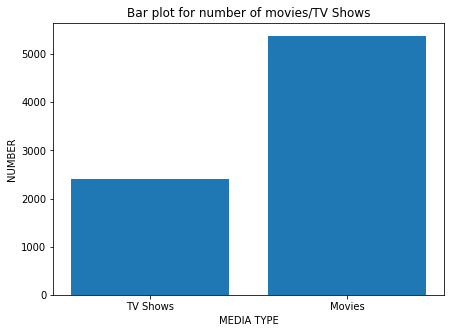

In [11]:
# BAR GRAPH FOR NUMBER OF MOVIES/TV SHOWS

plt.figure(figsize = (7,5))
plt.bar(['TV Shows','Movies'],[sum(nt.type == 'TV Show'),sum(nt.type == 'Movie')])
plt.title('Bar plot for number of movies/TV Shows')
plt.xlabel('MEDIA TYPE')
plt.ylabel('NUMBER')
plt.show()

In [12]:
n=0
for media in nt.title.unique():
    n+=1
print(n) # PRINTING NUMBER OF UNIQUE MEDIA

7787


In [13]:
n=0
for d in nt.director.unique():
    n+=1
print(n) # PRINTING NUMBER OF UNIQUE directors

4050


In [14]:
nt['director'].fillna('None',inplace = True)     # REMOVING THE NaN VALUES from DIRECTOR

In [15]:
direc_dict = {} # CREATING DICTIONARY FOR UNIQUE DIRECTORS AND COUNT OF MOVIES/TV SHOWS
for d in list(nt.director): 
        if (d in direc_dict): 
            direc_dict[d] += 1
        else: 
            direc_dict[d] = 1
#print(direc_dict)

In [16]:
# REMOVING NaN

del direc_dict['None']

In [17]:
# PRINTING DIRECTORS FOR MORE THAN 7 MOVIES

for key,value in direc_dict.items(): 
    if value>7:
        print(key)

Kunle Afolayan
Cathy Garcia-Molina
Jay Karas
Raúl Campos, Jan Suter
Youssef Chahine
Martin Scorsese
Marcus Raboy
Hakan Algül
Ryan Polito
Shannon Hartman
Johnnie To
Jay Chapman
Steven Spielberg
David Dhawan
Lance Bangs
Quentin Tarantino
Robert Rodriguez


In [18]:
#NUMBER OF COUNTRIES PRESENT

pd.DataFrame(nt.country.unique()).count()

0    681
dtype: int64

In [19]:
coun_dict = {} # CREATING DICTIONARY FOR UNIQUE DIRECTORS AND COUNT OF MOVIES/TV SHOWS
for c in list(nt.country): 
        if (c in coun_dict): 
            coun_dict[c] += 1
        else: 
            coun_dict[c] = 1

In [20]:
# PRINTING COUNTRIES FOR MORE THAN 30 MOVIES

for key,value in coun_dict.items(): 
    if value>30:
        print(key)

Brazil
Mexico
United States
Turkey
Egypt
India
Thailand
Nigeria
nan
United Kingdom
Japan
South Korea
Italy
Canada
Indonesia
Spain
France
Argentina
Germany
Australia
Taiwan
United States, United Kingdom
United States, Canada
United Kingdom, United States
Canada, United States
Hong Kong
China
Philippines
Colombia


In [21]:
# PRINTING COUNTRY WITH MAXIMUM NUMBER OF MOVIES

max_val = max(coun_dict.values())
ls = []

for key,value in coun_dict.items():
    if value == max_val:
        ls.append(key)
print(ls,max_val)

['United States'] 2555


In [22]:
# DATE_ADDED VARIABLE

nt.date_added

show_id
s1          August 14, 2020
s2        December 23, 2016
s3        December 20, 2018
s4        November 16, 2017
s5          January 1, 2020
                ...        
s7783      October 19, 2020
s7784         March 2, 2019
s7785    September 25, 2020
s7786      October 31, 2020
s7787         March 1, 2020
Name: date_added, Length: 7787, dtype: object

In [23]:
# CREATING BINS FOR HISTOGRAM

bins = [i for i in range(2010,2021)]
#print(bins)

In [24]:
nt['date_added'].fillna('0000',inplace = True) # Removing NA values

# Retreiving year from dates

l = []
for date in nt.date_added:
    temp = date[-4::]
    l.append(int(temp))

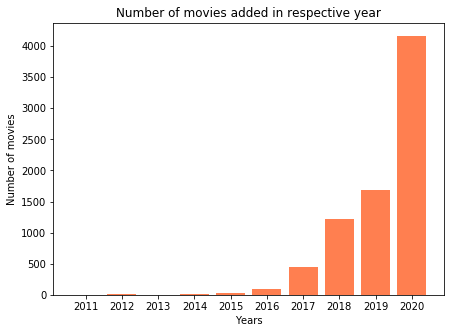

In [25]:
# HISTOGRAM FOR Number of movies added in respective year

plt.figure(figsize = (7,5))
plt.title('Number of movies added in respective year')
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.xticks(bins)
plt.hist(l,bins,align = 'right',rwidth=0.8,color = 'coral')
plt.show()

In [26]:
#RELEASE YEAR

nt.release_year

show_id
s1       2020
s2       2016
s3       2011
s4       2009
s5       2008
         ... 
s7783    2005
s7784    2015
s7785    2019
s7786    2019
s7787    2019
Name: release_year, Length: 7787, dtype: int64

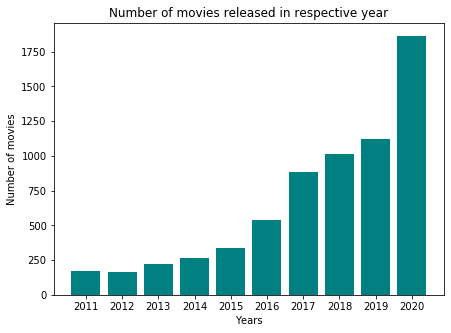

In [27]:
# NUMBER OF MOVIES RELEASED IN SPECIFIC YEAR

plt.figure(figsize = (7,5))
plt.title('Number of movies released in respective year')
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.xticks(bins)
plt.hist(nt.release_year,bins,align = 'right',rwidth=0.8,color = 'teal')
plt.show()

In [28]:
# RATING

nt.rating

show_id
s1       TV-MA
s2       TV-MA
s3           R
s4       PG-13
s5       PG-13
         ...  
s7783    TV-MA
s7784    TV-14
s7785    TV-MA
s7786    TV-PG
s7787    TV-MA
Name: rating, Length: 7787, dtype: object

In [29]:
# REMOVING NAN AND MAKING UNIQUE RATING LIST

nt.rating.fillna('None', inplace = True)
unique_rating_list = nt.rating.unique() # UNIQUE RATING
#unique_rating_list.fillna('None', inplace = True) # Making Nan None
#unique_rating_list = [x for x in unique_rating_list if x is not 'None'] # Removing None by list comprehension
#print(unique_rating_list) # Printing Unique Ratings

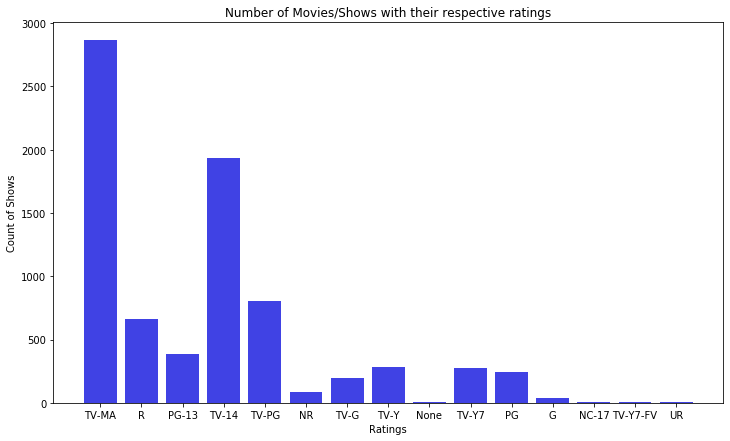

In [30]:
rate_dict = {} # CREATING DICTIONARY FOR UNIQUE RATINGS AND COUNT OF MOVIES/TV SHOWS
for r in list(nt.rating): 
        if (r in rate_dict): 
            rate_dict[r] += 1
        else: 
            rate_dict[r] = 1

# BAR CHART FOR NUMBER OF MOVIES/SHOWS WITH THEIR RATINGS
plt.figure(figsize = (12,7))
plt.title('Number of Movies/Shows with their respective ratings')
plt.xlabel('Ratings')
plt.ylabel('Count of Shows')
plt.bar(rate_dict.keys(),rate_dict.values(),color = '#4042e4') # PLOTTING BAR CHART FOR NUMBER OF RATINGS
plt.show()

In [31]:
# DURATION VARIABLE

nt.duration

show_id
s1       4 Seasons
s2          93 min
s3          78 min
s4          80 min
s5         123 min
           ...    
s7783       99 min
s7784      111 min
s7785       44 min
s7786     1 Season
s7787       90 min
Name: duration, Length: 7787, dtype: object

In [32]:
# UNIQUE DURATION
unique_duration = list(nt.duration.unique())
#print(unique_duration)

In [33]:
# DEMARCATING TV SERIES AND MOVIES SEPERATELY

season_TVSeries = []
minutes_Movies = []

for el in unique_duration:
    if el[-7::] == 'Seasons' or el[-6::] == 'Season':
        season_TVSeries.append(el)
    else:
        minutes_Movies.append(el)
#print(season_TVSeries)
#print(minutes_Movies)

In [34]:
# FOR SEASONS

bins = [x for x in range(1,16)]
#print(bins)
list_num_seasons = [int(re.sub(" .*", "", x)) for x in season_TVSeries]
#print(list_num_seasons)

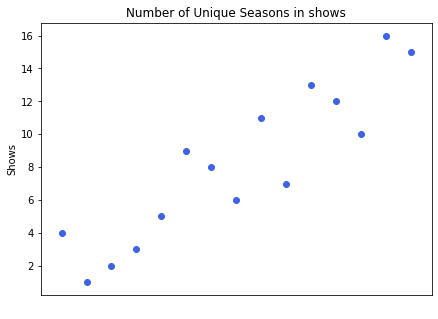

In [35]:
#BAR CHART FOR NUMBER OF UNIQUE SEASONS IN SHOWS

plt.figure(figsize = (7,5))
plt.title('Number of Unique Seasons in shows')
plt.ylabel('Shows')
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False) # REMOVING TICKS
plt.xticks(bins, " ") # REMOVING X LABEL VALUES
plt.scatter(bins,list_num_seasons,color = '#4062e4') 
plt.show()

In [36]:
# FOR MOVIES

bins = [x for x in range(0,321,40)]
list_time_movies = [int(re.sub(" .*", "", x)) for x in minutes_Movies]
#print(bins)
#print(list_time_movies)

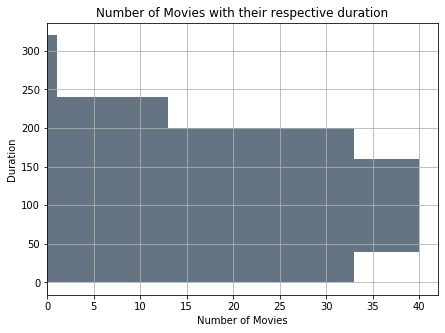

In [37]:
# BAR CHART FOR NUMBER OF RATINGS

plt.figure(figsize = (7,5))
plt.title('Number of Movies with their respective duration')
plt.xlabel('Number of Movies')
plt.ylabel('Duration')
plt.hist(list_time_movies,bins,color = '#657482', orientation = 'horizontal', align = 'mid') # PLOTTING 
                                                                                            #BAR CHART FOR NUMBER OF RATINGS
plt.grid(True,axis='both',which='major')
plt.show()

### END OF FILE